# Lab Experiment 2: Performing Discrete Fourier Transform on different signals
#### i) Make a Composite Sinusoidal Signal and perform DFT on it
#### ii) Apply DFT on an audio or voice signal and identify the frequency
#### iii) Find the frequency component in Healthcare by analyzing ECG Signals

In [15]:
# Importing Required Libraries after setting them in venv
import numpy as np
import matplotlib.pyplot as plt

**i) Make a Composite Sinusoidal Signal and perform DFT on it**  
Making a composite Sinusoidal wave consisting of 3 Sinusoidal Waves of frequencies 1,4,7 and amplitudes 3, 1, 0.5 respectively

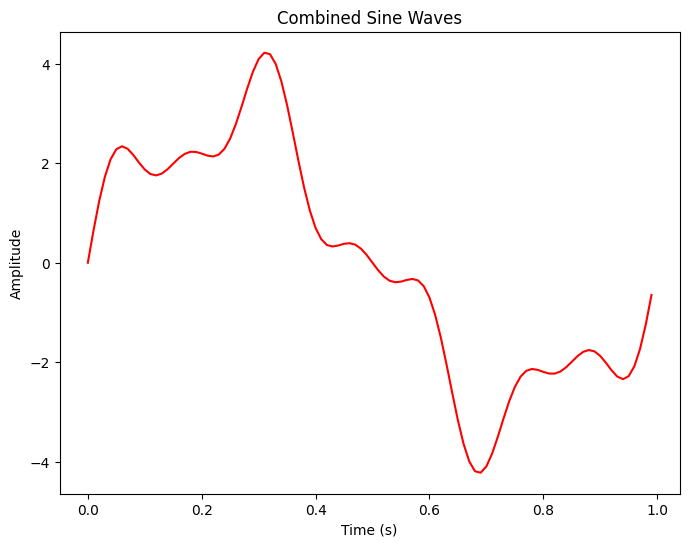

In [10]:
# Parameters
sampling_rate = 100  # Hz
duration = 1        # seconds
# Sampling interval
ts = 1.0 / sampling_rate
time = np.arange(0, duration, ts)

# Sine wave parameters
frequencies = [1, 4, 7]  # Hz
amplitudes = [3, 1, 0.5]
phases = [0, 0, 0]

# Generate sine waves
sine_waves = []
for freq, amp, phase in zip(frequencies, amplitudes, phases):
    sine_wave = amp * np.sin(2 * np.pi * freq * time + phase)
    sine_waves.append(sine_wave)

# Sum the sine waves
combined_signal = np.sum(sine_waves, axis=0)

# Plot the combined signal
plt.figure(figsize=(8, 6))
plt.plot(time, combined_signal ,'r')
plt.title('Combined Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

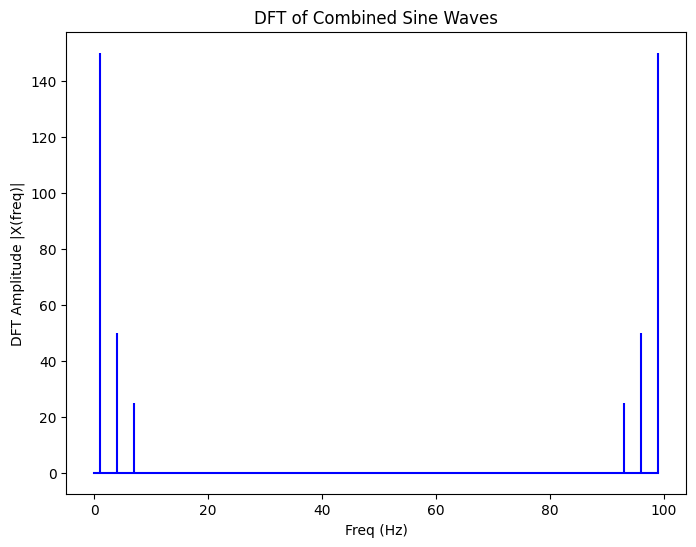

In [11]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

# Parameters
#sampling_rate = 100  # Hz
#duration = 1        # seconds
#num_samples = int(sampling_rate * duration)
#time = np.linspace(0, duration, num_samples)

# Perform DFT using the provided function
def perform_dft(x, sr):
    X = DFT(x)
    
    # Calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    
    plt.figure(figsize=(8, 6))
    plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('DFT Amplitude |X(freq)|')
    plt.title('DFT of Combined Sine Waves')
    plt.show()

# Perform DFT on the combined signal
perform_dft(combined_signal, sampling_rate)

In [12]:
# DFT function
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

# Perform DFT on the signal
X = DFT(x)

# Calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

# Plot the DFT result
plt.figure(figsize=(8, 6))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('DFT of Combined Sine Waves')
plt.show()

NameError: name 'x' is not defined

In [13]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile

ValueError: could not broadcast input array from shape (140928,) into shape (70464,)

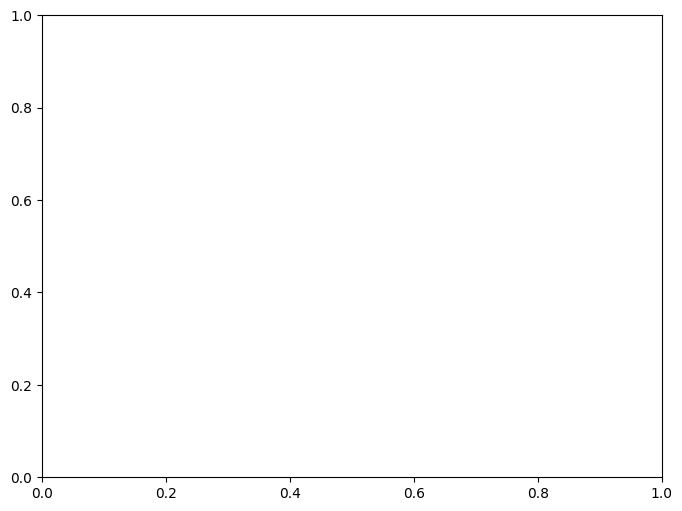

In [17]:
# Load the audio file
audio_file_path = 'sample_audio\sample-3s.wav'
sr, audio_signal = wavfile.read(audio_file_path)

# Perform FFT on the audio signal
fft_result = np.fft.fft(audio_signal)

# Calculate the frequency
N = len(fft_result)
freq = np.fft.fftfreq(N, d=1/sr)

# Plot the DFT result
plt.figure(figsize=(8, 6))
plt.stem(freq[:N//2], np.abs(fft_result)[:N//2], 'b', markerfmt=" ", basefmt="-b")  # Plot half due to symmetry
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('DFT of Audio Signal')
plt.show()

In [ ]:
# Load the audio file
audio_file_path = 'sample_audio\sample-3s.wav'
sr, audio_signal = wavfile.read(audio_file_path)

#data_dir = pjoin(dirname(scipy.io.__file__), 'sample_audio')
#wav_fname = pjoin(data_dir, 'sample-3s.wav')


#samplerate, data = wavfile.read(wav_fname)
#print(f"number of channels = {data.shape[1]}")
#length = data.shape[0] / samplerate
#print(f"length = {length}s")

In [ ]:
# Perform DFT on the audio signal
dft_result = DFT(audio_signal)

# Calculate the frequency
N = len(dft_result)
n = np.arange(N)
T = N / sr
freq = n / T


MemoryError: Unable to allocate 296. GiB for an array with shape (140928, 140928) and data type complex128

In [ ]:
#Plot the waveform
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Perform DFT on the audio signal
dft_result = DFT(audio_signal)

# Calculate the frequency
N = len(dft_result)
n = np.arange(N)
T = N / sr
freq = n / T

In [ ]:
# Plot the DFT result
plt.figure(figsize=(8, 6))
plt.stem(freq, abs(dft_result), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('DFT of Audio Signal')
plt.show()

In [ ]:
samplerate, data = wavfile.read(wav_fname)
# Load the audio file
audio_file_path = 'sample_audio\JALDI_WAHA_SE_HATO_MEME_SOUND_EFFECT.mp3'